## WiringOutputResist

PHY224H1S | 2020 Winter

Jeff Shen | 1004911526

Stacy Ossipov | 1004877779

24 Feb 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
def model(m, b, x):
    return m * x + b

def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [4]:
# read data (using dataframe because it's easier)
data = pd.read_csv('data2.csv')
data.current /= 1000 #converting to amps
data.ucurrent /= 1000

In [5]:
data.voltage / data.current

0      277.727273
1      665.217391
2     2550.000000
3     7650.000000
4      277.727273
5      658.064516
6     2554.166667
7     7675.000000
8      277.715877
9      661.589404
10    2500.000000
11    7700.000000
12     277.818854
13     660.964912
14    2477.049180
15    7560.000000
16     277.922078
17     660.616438
18    2475.641026
19    7430.769231
dtype: float64

In [54]:
data

,voltage,current,uvoltage,ucurrent
0,6.11,0.0220,0.015275,0.000165
1,6.12,0.0092,0.015300,0.000100
2,6.12,0.0024,0.015300,0.000100
3,6.12,0.0008,0.015300,0.000100
4,6.11,0.0220,0.015275,0.000165
5,6.12,0.0093,0.015300,0.000100
6,6.13,0.0024,0.015325,0.000100
7,6.14,0.0008,0.015350,0.000100
8,9.97,0.0359,0.024925,0.000269
9,9.99,0.0151,0.024975,0.000113


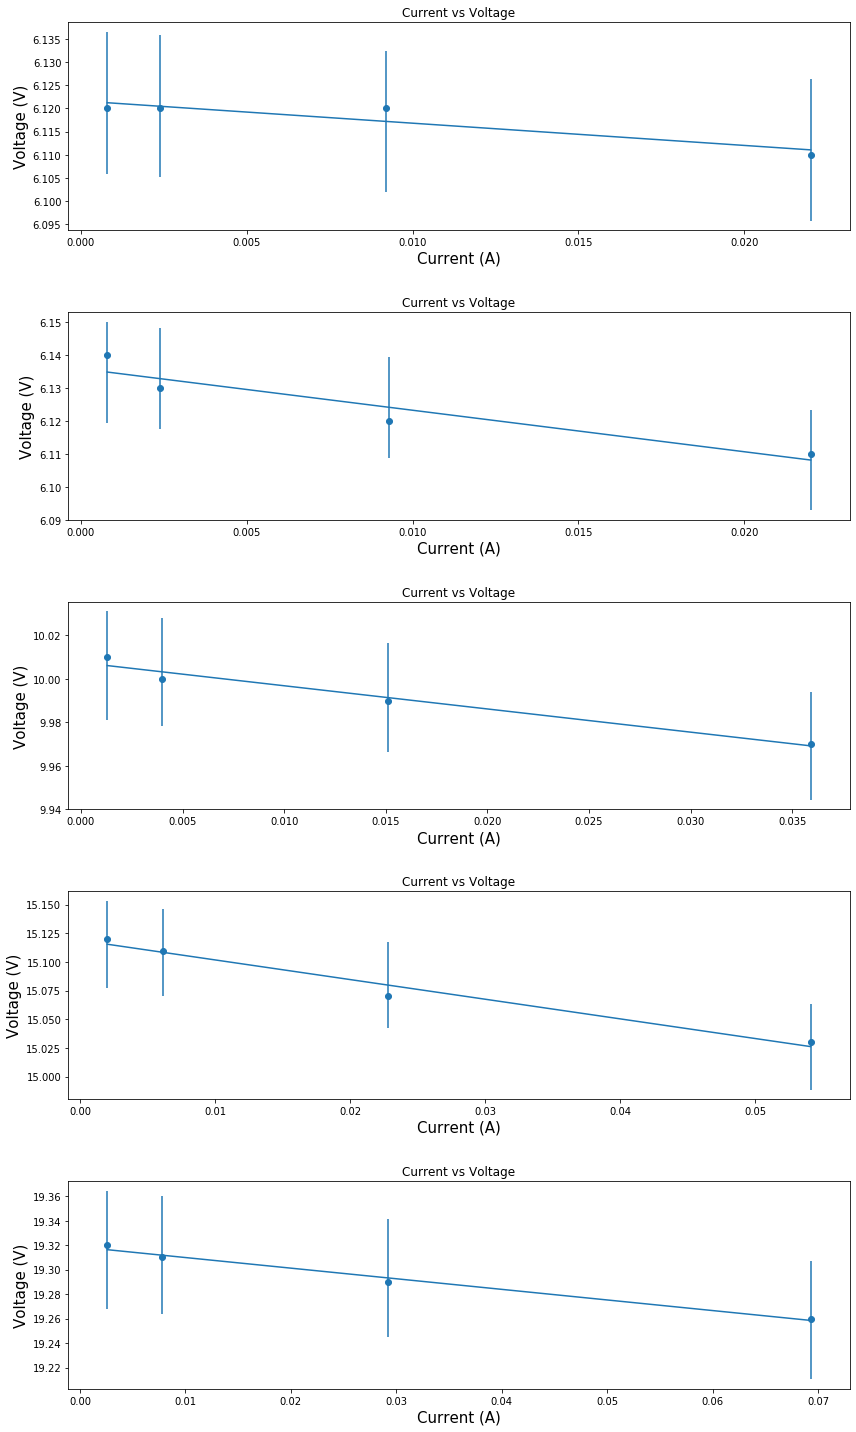

In [6]:
# making multiple plots

fig, ax = plt.subplots(5, figsize=(12, 20))
x = 4

resistances = np.zeros(int(data.shape[0] / x))
errors = np.zeros(int(data.shape[0] / x))
fits = np.zeros(int(data.shape[0] / x))

# loop over all resistors
for i in np.arange(0, data.shape[0], x):
    
    current = data.current[i:i+x]
    voltage = data.voltage[i:i+x]
    ucurrent = data.ucurrent[i:i+x]
    uvoltage = data.uvoltage[i:i+x]

    # fit curve
    popt, pcov = curve_fit(f=model, xdata=current, ydata=voltage, sigma=uvoltage, absolute_sigma=True)
    # reduced chi squared values
    fit_score = rcs(model(current, *popt), voltage, uvoltage, 2)
    
    # save slope (resistance) and corresponding errors
    
    resistances[int(i/x)] = popt[1]
    errors[int(i/x)] = np.sqrt(np.diag(pcov))[1]
    fits[int(i/x)] = fit_score

    print('\n')
    
    # plot results of fit with error bars 
    ax[int(i/x)].errorbar(current, model(current, *popt), yerr=uvoltage, marker='', ls='-')
    ax[int(i/x)].scatter(current, voltage)
    ax[int(i/x)].set_xlabel('Current (A)', fontsize=15)
    ax[int(i/x)].set_ylabel('Voltage (V)', fontsize=15)
    ax[int(i/x)].set_title('Current vs Voltage')

fig.tight_layout(h_pad=3)

In [56]:
print('Resistances')
for i in resistances:
    print(f'{-i:.3f}') # take the negative slope to be the resistance

print('\nCorresponding Errors')
for j in errors:
    print(f'{j:.3f}')
    
print('\nReduced Chi Squared of Fits')
for k in fits:
    print(f'{k:.3f}')

Resistances
0.480
1.261
1.068
1.713
0.866

Corresponding Errors
0.915
0.915
0.916
0.918
0.918

Reduced Chi Squared of Fits
0.023
0.117
0.022
0.047
0.006


In [13]:
# calculating the mean resistance for the power supply (over 4 different voltage values)
print(f'{-resistances[1:].mean():.3f}')
print(f'{np.square(errors[1:]).sum()/4:.3f}')

1.227
0.841
